In [1]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score

#warnings
import warnings
warnings.filterwarnings("ignore")

## DATA LOADING

## Load Data Set

In [2]:
df=pd.read_csv('portu_banking_final.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Atribute Information

## What is the significance of the y column in the dataset and what are the value counts of the y column?

In [3]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## What is the ratio of the two classes ? Are they balanced ?

<AxesSubplot:ylabel='y'>

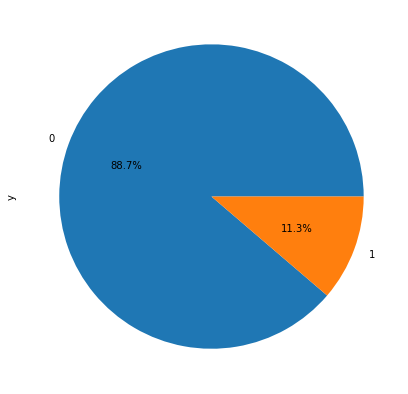

In [4]:
def plot_pie(dataset, target, size=(7,7)):
    return dataset[target].value_counts().plot.pie(autopct = '%1.1f%%', figsize=size)

plot_pie(df, 'y')

## DATA CLEANING

In [5]:
df.shape

(41188, 21)

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
#I used:
#df['age'] = pd.to_numeric(df['age'])
#print(df['age'].dtypes)

#but I got an error

# Unable to parse string "35-30" at position 74
#and other ranges
#you cant have a ranges as an intenger

In [9]:
df['age'] = df['age'].replace(['35-30','30-35'],'35')
df['age'] = df['age'].replace(['25-30','30-25'],'30')
df['age'] = df['age'].replace(['18-25','25-18'],'25')
df['age'] = df['age'].replace(['32-30','30-32'],'32')
df['age'] = df['age'].replace(['55-50','50-55'],'55')
df['age'] = df['age'].replace(['45-50','50-45'],'50')
df['age'] = df['age'].replace(['20-25','25-20'],'25')
df['age'] = df['age'].replace(['20-40','40-20', '35-40','30-40'],'40')

In [10]:
df['age'] = pd.to_numeric(df['age'])
print(df['age'].dtypes)

#could have used
#df['age']=df['age'].astype(int)
#but it wont give you the row location of error

int64


In [11]:
#don't see any other errors, will fix as I go

In [12]:
# found errors with job titles when using .groupby functions on jobs

df['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
HOUSEMAID            1
UNKNOWN              1
TECHNICIAN           1
MANAGEMENT           1
BLUE-COLLAR          1
Name: job, dtype: int64

In [13]:
#will correct errors

df['job'] = df['job'].replace('RETIRED','retired')
df['job'] = df['job'].replace('SERVICES','services')
df['job'] = df['job'].replace('STUDENT','student')
df['job'] = df['job'].replace('ADMIN.','admin.')
df['job'] = df['job'].replace('BLUE-COLLAR','blue-collar')
df['job'] = df['job'].replace('TECHNICIAN','technician')
df['job'] = df['job'].replace('HOUSEMAID','housemaid')
df['job'] = df['job'].replace('UNKNOWN','unknown')
df['job'] = df['job'].replace('MANAGEMENT','management')
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [14]:
#since I found errors with the strings, will check the other columns

print(df['y'].value_counts())
print('______________________')
print(df['marital'].value_counts())
print('______________________')
print(df['education'].value_counts())
print('______________________')
print(df['poutcome'].value_counts())
print('______________________')
print(df['month'].value_counts())
print('______________________')
print(df['day_of_week'].value_counts())

#I already fixed 'job', 'y' seems okay, but I have to fix both martital and education strings 

0    36548
1     4640
Name: y, dtype: int64
______________________
married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64
______________________
university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64
______________________
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
______________________
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
______________________
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int6

In [15]:
#fixing strings from other columns

df['education'] = df['education'].replace('basic-4y','basic.4y')
df['education'] = df['education'].replace('basic-9y','basic.9y')
df['education'] = df['education'].replace('basic-6y','basic.6y')

df['marital'] = df['marital'].replace('M','married')
df['marital'] = df['marital'].replace(['D','divorces'],'divorced')
df['marital'] = df['marital'].replace('S','single')

print(df['marital'].value_counts())
print('______________________')
print(df['education'].value_counts())

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
______________________
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


## EDA

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024643,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.420932,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [17]:
#will use ''.groupby' with aggregation to determine ratios for jobs
results = df.groupby('job').agg({'y':['mean']}, axis=1)
results

#base of the means, students and retired people are more than likely to do a deposit

,y
,mean
job,
admin.,0.129726
blue-collar,0.068943
entrepreneur,0.085165
housemaid,0.100000
management,0.112175
retired,0.252326
self-employed,0.104856
services,0.081381


In [18]:
#will use ''.groupby' with aggregation to determine ratios for jobs
results = df.groupby('poutcome').agg({'y':['mean']}, axis=1)
results

#seems significant

,y
,mean
poutcome,
failure,0.142286
nonexistent,0.088322
success,0.651129


In [19]:
#will use ''.groupby' with aggregation to determine ratios for jobs
results = df.groupby('day_of_week').agg({'y':['mean']}, axis=1)
results

#seems insignificant

,y
,mean
day_of_week,
fri,0.108087
mon,0.099483
thu,0.121188
tue,0.117800
wed,0.116671


In [20]:
#will use ''.groupby' with aggregation to determine ratios for jobs
results = df.groupby('month').agg({'y':['mean']}, axis=1)
results

#seems significant

,y
,mean
month,
apr,0.204787
aug,0.106021
dec,0.489011
jul,0.090466
jun,0.105115
mar,0.505495
may,0.064347
nov,0.101439


In [21]:
#will use ''.groupby' with aggregation to determine ratios for marital
results = df.groupby('marital').agg({'y':['mean']}, axis=1)
results

#it seems as if marital status doesn't heavily influnence deposit rates

,y
,mean
marital,
divorced,0.103209
married,0.101573
single,0.140041
unknown,0.150000


In [22]:
#will use ''.groupby' with aggregation to determine ratios for jobs
results = df.groupby('education').agg({'y':['mean']}, axis=1)
results

#it seems as if illiterates are in favored of deposits but they are a very small count 
#of the education population

,y
,mean
education,
basic.4y,0.102490
basic.6y,0.082024
basic.9y,0.078246
high.school,0.108355
illiterate,0.222222
professional.course,0.113485
university.degree,0.137245
unknown,0.145003


In [23]:
# Build a function to show categorical values disribution using regular bar graphs

def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 0][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

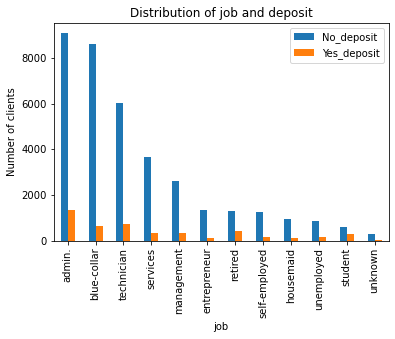

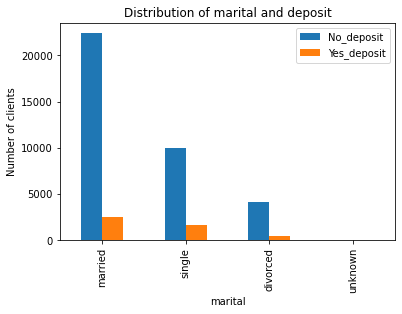

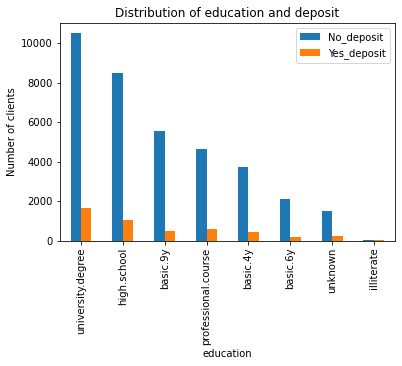

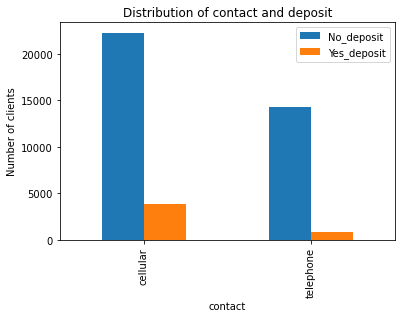

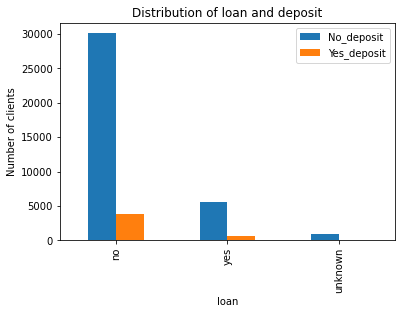

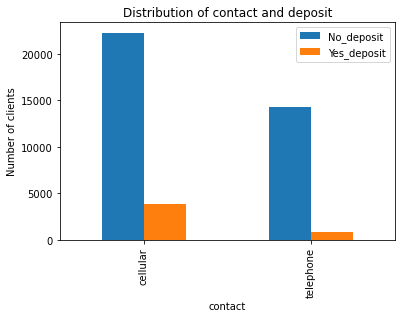

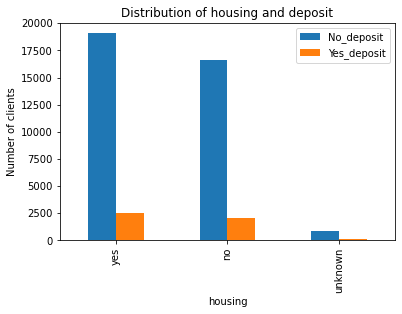

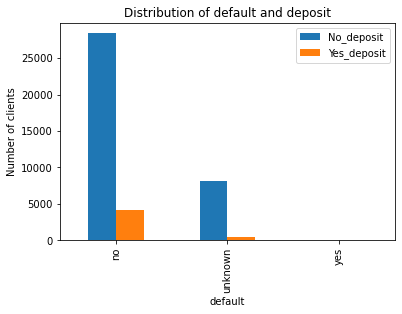

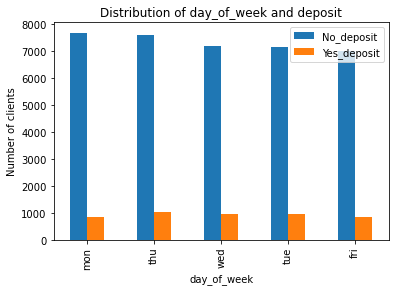

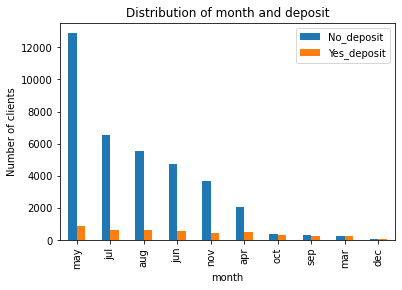

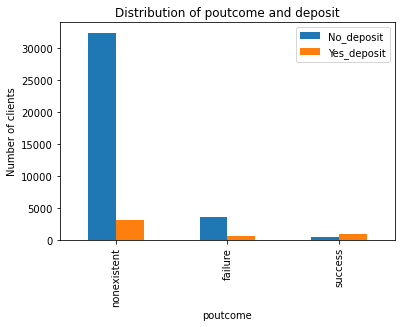

(None, None, None, None, None)

In [24]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('contact'),
plot_bar('housing'), plot_bar('default'), plot_bar('day_of_week'), plot_bar('month'), plot_bar('poutcome')

In [25]:
# Build a function to show categorical values disribution using stack bar graphs

def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 0][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 1][column].value_counts()
    temp_1.plot(kind='bar', stacked=True)
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

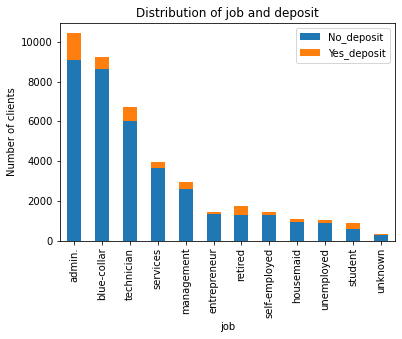

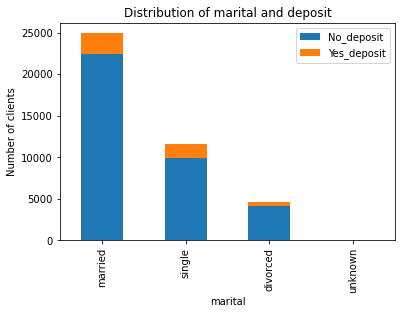

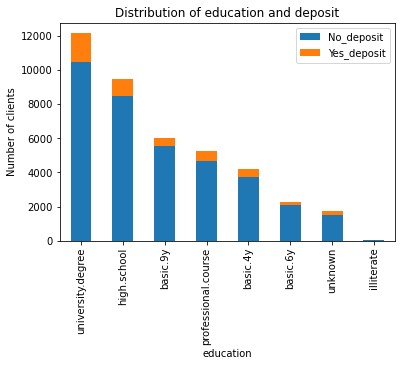

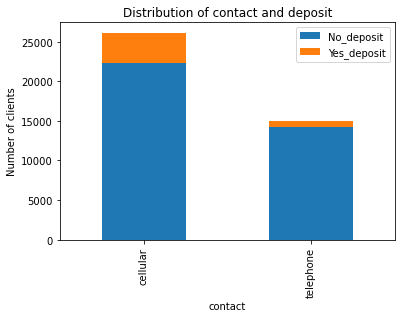

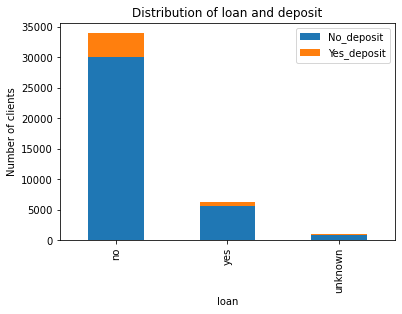

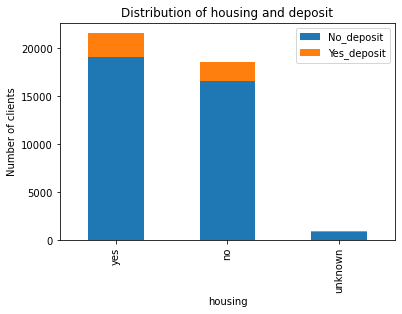

(None, None, None, None, None, None)

In [26]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

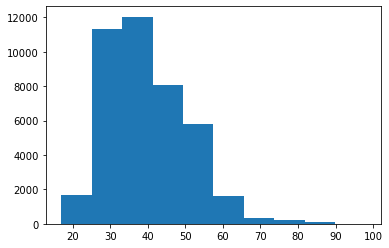

In [27]:
#histogram for age in sections of 10 

x=df['age']
plt.hist(df['age'],10)
plt.show()

#It would seem their biggest target are people between the ages of 30-55

In [28]:
# Build correlation matrix for numerical columns
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

#of the numerical categories, the only worth noting are: 'duration', 'pdays', 
#'emp_var_rate', 'euribor3m', 'nr_employed', 'previous'. The rest have little importance

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000896,0.004570,-0.032912,0.024355,-0.000370,0.000839,0.129349,0.010775,-0.017710,0.030380
duration,-0.000896,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004570,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.032912,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609
previous,0.024355,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000370,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000839,0.005312,0.127836,0.070331,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129349,-0.008173,-0.013733,-0.082578,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010775,-0.032897,0.135133,0.263918,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017710,-0.044703,0.144095,0.331380,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


## Categorical Variable Encoding

In [29]:
# Making dummy variables of category columns:
df_dummies = pd.get_dummies(df, prefix='', prefix_sep='', 
                            columns=['contact', 'loan', 'housing', 'marital', 'default', 'education'])
df_dummies.head()

,age,job,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,...,unknown,yes,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,44,blue-collar,aug,thu,210,1,999.0,0,nonexistent,1.4,...,1,0,1,0,0,0,0,0,0,0
1,53,technician,nov,fri,138,1,999.0,0,nonexistent,-0.1,...,0,0,0,0,0,0,0,0,0,1
2,28,management,jun,thu,339,3,6.0,2,success,-1.7,...,0,0,0,0,0,0,0,0,1,0
3,39,services,apr,fri,185,2,999.0,0,nonexistent,-1.8,...,0,0,0,0,0,1,0,0,0,0
4,55,retired,aug,fri,137,1,3.0,1,success,-2.9,...,0,0,1,0,0,0,0,0,0,0


In [30]:
df_dummies.info()

#im not liking the dummie variables, will make diffrent dummy variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   month                41188 non-null  object 
 3   day_of_week          41188 non-null  object 
 4   duration             41188 non-null  int64  
 5   campaign             41188 non-null  int64  
 6   pdays                41188 non-null  float64
 7   previous             41188 non-null  int64  
 8   poutcome             41188 non-null  object 
 9   emp_var_rate         41188 non-null  float64
 10  cons_price_idx       41188 non-null  float64
 11  cons_conf_idx        41188 non-null  float64
 12  euribor3m            41188 non-null  float64
 13  nr_employed          41188 non-null  float64
 14  y                    41188 non-null  int64  
 15  cellular             41188 non-null 

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [32]:
#turn categories to binary options to make dummies easier
df2=df.copy()

#turn education to college vs no.college 
df2['education'] = df2['education'].replace(['basic.4y','basic.6y','basic.9y',
                                           'high.school','illiterate','unknown'],'no.higher.education')
df2['education'] = df2['education'].replace(['university.degree', 'professional.course'],'higher.education')

#turn marital to married vs not.married 
df2['marital'] = df2['marital'].replace(['divorced','single','unknown'],'not.married')
df2['marital'] = df2['marital'].replace('married', 'married')

#turn housing no.housing vs housing 
df2['housing']=df2['housing'].replace(['unknown','no'], 'no.housing')
df2['housing']=df2['housing'].replace('yes', 'housing')

#turn default to defualted vs no.default
df2['default']=df2['default'].replace(['no','unknown'],'no.defualt')
df2['default']=df2['default'].replace('yes','defaulted')

#turn loan to loan vs no.loan
df2['loan']=df2['loan'].replace(['no','unknown'],'no.loan')
df2['loan']=df2['loan'].replace('yes','loan')

#turn poutcome to success vs failure
df2['poutcome']=df2['poutcome'].replace(['nonexistent','failure'],'failure')
df2['poutcome']=df2['poutcome'].replace('success','success')

df2['poutcome'].value_counts()

failure    39815
success     1373
Name: poutcome, dtype: int64

In [33]:
#turn categories to binary values incase it is needed leater
df3=df.copy()

#education 
df3['education'] = df3['education'].replace(['basic.4y','basic.6y','basic.9y',
                                           'high.school','illiterate','unknown'],0)
df3['education'] = df3['education'].replace(['university.degree', 'professional.course'],1)

#turn marital to married vs not.married 
df3['marital'] = df3['marital'].replace(['divorced','single','unknown'],0)
df3['marital'] = df3['marital'].replace('married', 1)

#turn housing no.housing vs housing 
df3['housing']=df3['housing'].replace(['unknown','no'], 0)
df3['housing']=df3['housing'].replace('yes', 1)

#turn default to defualted vs no.default
df3['default']=df3['default'].replace(['no','unknown'],0)
df3['default']=df3['default'].replace('yes',1)

#turn loan to loan vs no.loan
df3['loan']=df3['loan'].replace(['no','unknown'],0)
df3['loan']=df3['loan'].replace('yes',1)

#turn poutcome to success vs failure
df3['poutcome']=df3['poutcome'].replace(['nonexistent','failure'],0)
df3['poutcome']=df3['poutcome'].replace('success',1)

df3['loan'].value_counts()

0    34940
1     6248
Name: loan, dtype: int64

In [34]:
# Build a function to show categorical values disribution using regular bar graphs

def plot_bar1(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df2[df2['y'] == 0][column].value_counts()
    temp_1['Yes_deposit'] = df2[df2['y'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

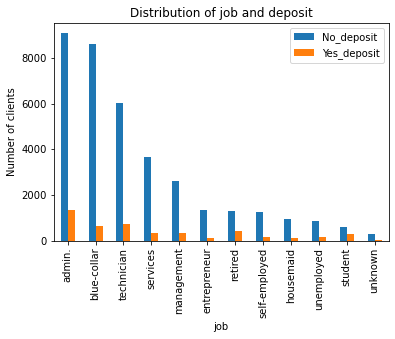

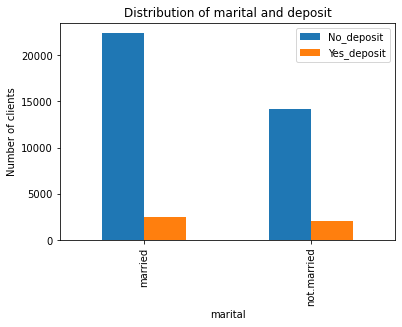

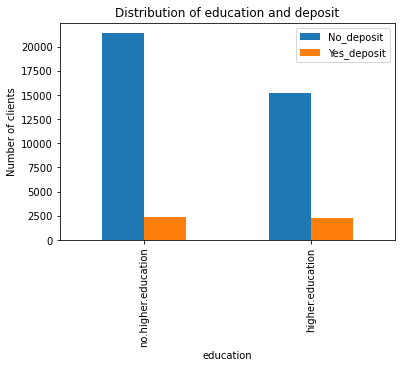

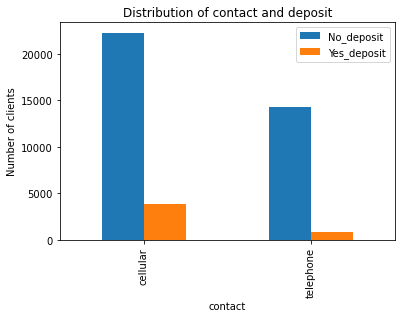

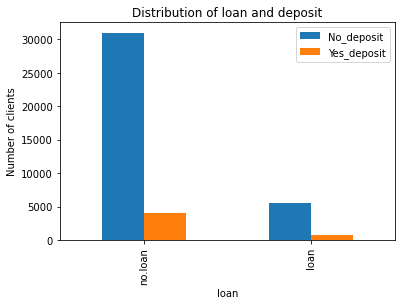

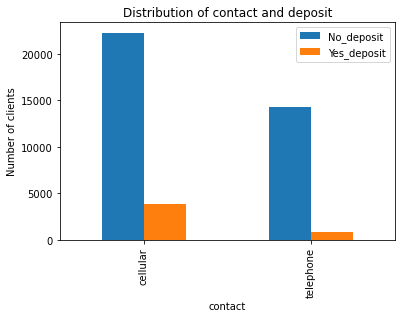

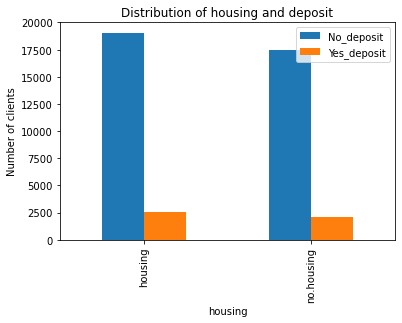

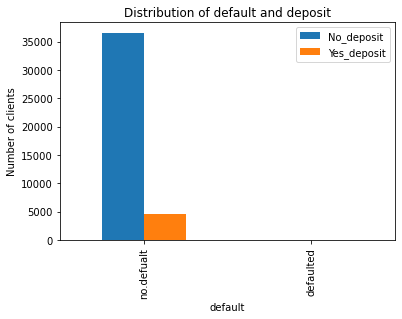

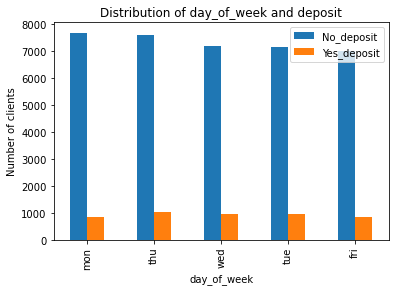

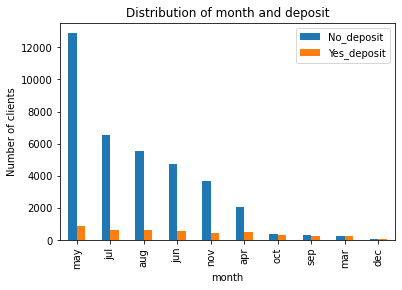

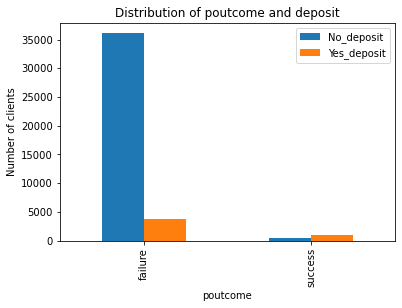

(None, None, None)

In [35]:
plot_bar1('job'), plot_bar1('marital'), plot_bar1('education'), plot_bar1('contact'), 
plot_bar1('loan'), plot_bar1('contact'), plot_bar1('housing'), plot_bar1('default'), 
plot_bar1('day_of_week'), plot_bar1('month'), plot_bar1('poutcome')

In [36]:
#will use ''.groupby' with aggregation to determine ratios for marital
results = df2.groupby('marital').agg({'y':['mean']}, axis=1)
results

#it seems as if marital status doesn't heavily influnence deposit rates

,y
,mean
marital,
married,0.101573
not.married,0.129643


In [37]:
#will use ''.groupby' with aggregation to determine ratios for marital
results = df2.groupby('housing').agg({'y':['mean']}, axis=1)
results

#it seems as if housing status doesn't heavily influnence deposit rates

,y
,mean
housing,
housing,0.116194
no.housing,0.108760


In [38]:
#will use ''.groupby' with aggregation to determine ratios for marital
results = df2.groupby('default').agg({'y':['mean']}, axis=1)
results

#people who default don't deposit

,y
,mean
default,
defaulted,0.000000
no.defualt,0.112662


In [39]:
#will use ''.groupby' with aggregation to determine ratios for marital
results = df2.groupby('loan').agg({'y':['mean']}, axis=1)
results

#it seems as if loan status doesn't heavily influnence deposit rates

,y
,mean
loan,
loan,0.109315
no.loan,0.113251


In [40]:
#will use ''.groupby' with aggregation to determine ratios for marital
results = df2.groupby('poutcome').agg({'y':['mean']}, axis=1)
results

#it seems very significant

,y
,mean
poutcome,
failure,0.094085
success,0.651129


## Preliminary Training

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [42]:
#need to adjust duration of 999 to 0

df3['pdays']=df3['pdays'].replace(999,0)
df3['pdays']=df3['pdays'].replace(999,0)

#did for both data frames to use interchangely if need be

In [43]:
#we need to use the important columns to train data

# The only important category is month and jobs but I'll use the others andthen adjust
#the other columns have been turned numerical so only these four remain
cols_cat = df3[["day_of_week", "contact", "month", "job"]]

cols_cat.head()

,day_of_week,contact,month,job
0,thu,cellular,aug,blue-collar
1,fri,cellular,nov,technician
2,thu,cellular,jun,management
3,fri,cellular,apr,services
4,fri,cellular,aug,retired


In [44]:
#will make a data frame that only has numerical data only 

cols_num = df3.drop(["day_of_week", "contact", "month", "job"], axis=1)
cols_num.head()

,age,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,0,0,1,0,210,1,0.0,0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,0,0,0,0,138,1,0.0,0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,0,1,0,1,0,339,3,6.0,2,1,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,1,0,0,0,0,185,2,0.0,0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,1,0,0,1,0,137,1,3.0,1,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [45]:
#will create dummies for catagory data frame

cols_cat_dummy = pd.get_dummies(cols_cat, sparse=True)
cols_cat_dummy.head()

,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
#join both numerical and category data frame but it all is binary now *****

All_cols = pd.concat([cols_num, cols_cat_dummy], axis=1, join='inner')
All_cols.head()

print(cols_num.shape)
print(cols_cat_dummy.shape)
print(All_cols.shape)

(41188, 17)
(41188, 29)
(41188, 46)


In [47]:
#seperating dependent data vs independent

x = All_cols.drop(['y'], axis = 1) #independent
y = All_cols['y'] #dependent

print('size of the array', All_cols.shape)

size of the array (41188, 46)


## Logistic Regression

In [81]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train) #Training the model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(verbose=1)

In [51]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

#Check ROC_AUC
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(x_test, y_test)))

[0 0 1 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7312
           1       0.66      0.37      0.47       926

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.91      0.90      8238

---------------------------------------------
ROC_AUC is 0.9249551611363434 and accuracy rate is 0.9078659868900218


## Balance Weight

In [107]:
#Split the data into 80% training and 20% testing
x_train_bw, x_test_bw, y_train_bw, y_test_bw = train_test_split(x, y, test_size=0.2)

#Train the model with class_weight='balanced'
model_bw = LogisticRegression(class_weight='balanced')
model_bw.fit(x_train_bw, y_train_bw) #Training the model

LogisticRegression(class_weight='balanced')

In [108]:
#Test the model
predictions_bw = model_bw.predict(x_test_bw)
print(predictions_bw)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test_bw, predictions_bw) )

#Check ROC_AUC
auc = roc_auc_score(y_test_bw, model_bw.predict_proba(x_test_bw)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model_bw.score(x_test_bw, y_test_bw)))

[1 0 0 ... 1 1 0]

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7314
           1       0.40      0.86      0.55       924

    accuracy                           0.84      8238
   macro avg       0.69      0.85      0.72      8238
weighted avg       0.91      0.84      0.86      8238

---------------------------------------------
ROC_AUC is 0.9222772373920856 and accuracy rate is 0.8398883224083515


## Smote

In [84]:
#Have to install into anaconda promp: conda install -c conda-forge imbalanced-learn

#then import to IDE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

#Split the data into 80% training and 20% testing
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x, y, test_size=0.2)

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(x_train_sm, y_train_sm)

In [55]:
#here we can see the imbalance in deposits vs no deposits

unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 29236, 1: 3714}

In [56]:
#after applying smote we can see how the dependent variable has been porportianated.

unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 29236, 1: 29236}

In [57]:
#to better see the changes in weights of the binary target

print(y_train.value_counts())
print('______________________')
print(y_train_res.value_counts())

0    29236
1     3714
Name: y, dtype: int64
______________________
1    29236
0    29236
Name: y, dtype: int64


In [58]:
#Train the model
model_sm = LogisticRegression(verbose=1)
model_sm.fit(x_train_res, y_train_res) #Training the model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(verbose=1)

In [85]:
#Test the model
predictions_sm = model_sm.predict(x_test_sm)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test_sm, predictions_sm) )

#the precision on the target goal has increased from 0.41 to 0.48 at the cost
#of a slight decrease in the unwated precision

#Check ROC_AUC
auc = roc_auc_score(y_test_sm, model_sm.predict_proba(x_test)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model_sm.score(x_test_sm, y_test_sm)))

[0 0 1 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7342
           1       0.44      0.78      0.56       896

    accuracy                           0.87      8238
   macro avg       0.70      0.83      0.74      8238
weighted avg       0.91      0.87      0.88      8238

---------------------------------------------
ROC_AUC is 0.5042335316379343 and accuracy rate is 0.8663510560815731


## RFE

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Using RFE we will rank columns  

model_RFE = LogisticRegression(solver='lbfgs')
rfe = RFE(model_RFE, 40)
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 40
Selected Features: [ True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True False]
Feature Ranking: [1 1 1 6 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 2 1 1 1 1 1 1 3]


In [91]:
#will check that independent variables were transform

x_selected = fit.transform(x)

print("x.shape: {}".format(x.shape))
print("x_selected.shape: {}".format(x_selected.shape))

x.shape: (41188, 45)
x_selected.shape: (41188, 40)


In [92]:
#Comparing the score of the regular model versus the transform model

x_test_selected = fit.transform(x)

model_RFE.fit(x,y)
print("Scoree with all features: {:,.3f}".format(model_RFE.score(x_test,y_test)))

model_RFE.fit(x_selected,y)
print("Scoree with selected features: {:,.3f}".format(model_RFE.score(x_test_selected,y)))

Scoree with all features: 0.896
Scoree with selected features: 0.907


In [93]:
#Will use RFE to compare to train data to see if the results are better

model_RFE1 = LogisticRegression(solver='lbfgs')
rfe = RFE(model_RFE1, 40)
fit1 = rfe.fit(x_train, y_train)
print("Num Features: %d" % fit1.n_features_)
print("Selected Features: %s" % fit1.support_)
print("Feature Ranking: %s" % fit1.ranking_)

Num Features: 40
Selected Features: [ True  True  True False  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False]
Feature Ranking: [1 1 1 6 1 1 1 3 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 4]


In [94]:
#Checking that the train data transform

x_train_selected1 = fit1.transform(x_train)

print("x.shape: {}".format(x_train.shape))
print("x_selected.shape: {}".format(x_train_selected1.shape))

x.shape: (32950, 45)
x_selected.shape: (32950, 40)


In [95]:
#scoring the model and it would seem the train model perform a little better than the
#regular model, the only difference between the two is that the regular model replaces 
#'age' with 'job_manager'

x_test_selected1 = fit1.transform(x_test)

model_RFE1.fit(x_train,y_train)
print("Score with all features: {:,.3f}".format(model_RFE1.score(x_test,y_test)))

model_RFE1.fit(x_train_selected1,y_train)
print("Score with selected features: {:,.3f}".format(model_RFE1.score(x_test_selected1,y_test)))

Score with all features: 0.896
Score with selected features: 0.904


In [96]:
x1 = x.copy()
x1=x1.drop(["age", "default", "pdays", "job_housemaid", "job_unknown"], axis = 1)
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype           
---  ------             --------------  -----           
 0   marital            41188 non-null  int64           
 1   education          41188 non-null  int64           
 2   housing            41188 non-null  int64           
 3   loan               41188 non-null  int64           
 4   duration           41188 non-null  int64           
 5   campaign           41188 non-null  int64           
 6   previous           41188 non-null  int64           
 7   poutcome           41188 non-null  int64           
 8   emp_var_rate       41188 non-null  float64         
 9   cons_price_idx     41188 non-null  float64         
 10  cons_conf_idx      41188 non-null  float64         
 11  euribor3m          41188 non-null  float64         
 12  nr_employed        41188 non-null  float64         
 13  day_of_week_fri    41188 non-nu

## Logistic Data With RFE Model

In [97]:
#the model_RFE1 ihas best results
#Split the data into 80% training and 20% testing
x_train_RFE1, x_test_RFE1, y_train_RFE1, y_test_RFE1 = train_test_split(x1, y, test_size=0.2)

#Train the model
model_RFE1 = LogisticRegression(verbose=1)
model_RFE1.fit(x_train_RFE1, y_train_RFE1) #Training the model



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(verbose=1)

In [98]:
#Test the model
predictions_RFE1 = model_RFE1.predict(x_test_RFE1)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test_RFE1, predictions_RFE1) )

#Check ROC_AUC & Accuracy
auc = roc_auc_score(y_test_RFE1, model_RFE1.predict_proba(x_test_RFE1)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model_RFE1.score(x_test_RFE1, y_test_RFE1)))

[0 0 1 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7341
           1       0.63      0.40      0.49       897

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238

---------------------------------------------
ROC_AUC is 0.9332286692674745 and accuracy rate is 0.9089584850691915


## Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

The accuracy of the Model 0.834425831512503
Confusion matrix, without normalization
[[7093  154]
 [ 705  286]]
Normalized confusion matrix
[[0.97874983 0.02125017]
 [0.71140262 0.28859738]]


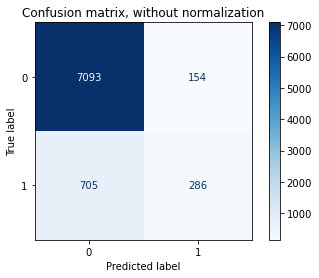

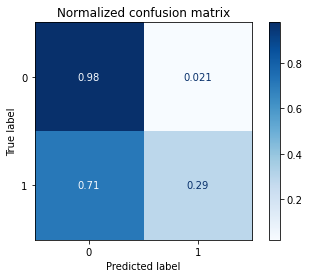

In [99]:
#Confusion Matrix For Regular Logistic 

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = [0, 1]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Very low target turn out even though it has 83% accuracy

The accuracy of the Model 0.8663510560815731
Smote Confusion matrix, without normalization
[[6437  905]
 [ 196  700]]
Smote Normalized confusion matrix
[[0.87673658 0.12326342]
 [0.21875    0.78125   ]]


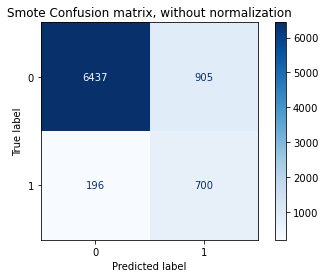

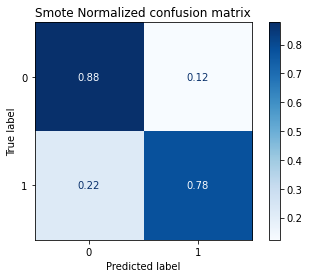

In [100]:
#Confusion Matrix For Smote, an equalzer of weighted inputs

print( "The accuracy of the Model",accuracy_score(y_test_sm, predictions_sm))

class_names = [0, 1]

titles_options = [("Smote Confusion matrix, without normalization", None),
                  ("Smote Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_sm, x_test_sm, y_test_sm,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Huge improvement on target output with a slight increase in false positive
#There was a slight increase in accuracy

The accuracy of the Model 0.9089584850691915
RFE1 Confusion matrix, without normalization
[[7130  211]
 [ 539  358]]
RFE1 Normalized confusion matrix
[[0.97125732 0.02874268]
 [0.60089186 0.39910814]]


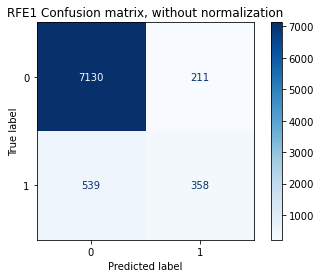

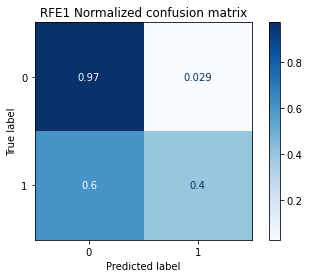

In [102]:
#Confusion Matrix For Rank Feauture Elimination

print( "The accuracy of the Model",accuracy_score(y_test_RFE1, predictions_RFE1))

class_names = [0, 1]

titles_options = [("RFE1 Confusion matrix, without normalization", None),
                  ("RFE1 Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_RFE1, x_test_RFE1, y_test_RFE1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Target improve sigmifacatly but not as much as SMOTE
#However, there was no change in false positive
#and a descent incrase in accuracy

The accuracy of the Model 0.8448652585579024
Weight Confusion matrix, without normalization
[[6143 1172]
 [ 106  817]]
Weighte Normalized confusion matrix
[[0.83978127 0.16021873]
 [0.1148429  0.8851571 ]]


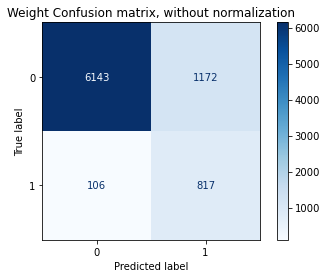

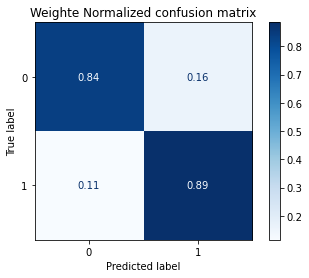

In [103]:
#Confusion Matrix For a weighted logistic regression

print( "The accuracy of the Model",accuracy_score(y_test_bw, predictions_bw))

class_names = [0, 1]

titles_options = [("Weight Confusion matrix, without normalization", None),
                  ("Weighte Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_bw, x_test_bw, y_test_bw,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Accuracy remained the same, and False positive increased significantly
#However, Target Prediction perform amazing

## Conclusion